In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("clean_dataset.csv")

In [3]:
data.head(5)

,Unnamed: 0,title,content,category
0,0,"কালিয়াকৈরে টিফিন খেয়ে ৫০০ শ্রমিক অসুস্থ, বিক...",গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায়...,bangladesh
1,1,সেমিফাইনাল বাধাও পেরিয়ে গেলেন লিসিকি,এবারের উইম্বলডনটা স্মরণীয় রাখার মিশনেই নেমেছে...,sports
2,2,সংসদে খালেদার অভিযোগের জবাব দিয়েছে ভারত,জাতীয় সংসদে বিএনপি চেয়ারপারসন বিরোধীদলীয় নে...,bangladesh
3,3,পাসওয়ার্ড ভুলে যান!,সহজ পাসওয়ার্ডের কারণে অনলাইন অ্যাকাউন্ট সহজেই...,technology
4,4,চলে গেলেন মাউস উদ্ভাবক,কম্পিউটার মাউসের উদ্ভাবক ডগলাস অ্যাঙ্গেলবার্ট ...,technology


In [4]:
data['category'].value_counts()

category
bangladesh       232504
sports            49012
international     30856
entertainment     30466
economy           17245
opinion           15699
technology        12116
life-style        10852
education          9721
Name: count, dtype: int64

In [5]:
temp_df1 = data[data['category'] == 'bangladesh'][:10000]
temp_df2 = data[data['category'] == 'international'][:10000]
temp_df3 = data[data['category'] == 'entertainment'][:10000]
temp_df4 = data[data['category'] == 'economy'][:10000]
temp_df5 = data[data['category'] == 'opinion'][:10000]
temp_df6 = data[data['category'] == 'technology'][:10000]
temp_df7 = data[data['category'] == 'life-style'][:10000]
temp_df8 = data[data['category'] == 'sports'][:10000]

temp_data = pd.concat([temp_df1,temp_df2,temp_df3,temp_df4,temp_df5,temp_df6,temp_df7,temp_df8])

In [6]:
temp_data.head(5)

,Unnamed: 0,title,content,category
0,0,"কালিয়াকৈরে টিফিন খেয়ে ৫০০ শ্রমিক অসুস্থ, বিক...",গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায়...,bangladesh
2,2,সংসদে খালেদার অভিযোগের জবাব দিয়েছে ভারত,জাতীয় সংসদে বিএনপি চেয়ারপারসন বিরোধীদলীয় নে...,bangladesh
6,6,খালেদা দুষ্টু কথা বলেছেন: স্বরাষ্ট্রমন্ত্রী,যুক্তরাষ্ট্রের বাজারে জিএসপি-সুবিধা বন্ধ প্রসঙ...,bangladesh
7,7,আরও ১১টি বিমা কোম্পানি অনুমোদন পেল,১১টি বিমা কোম্পানিকে লাইসেন্সের অনুমোদন বিমা উ...,bangladesh
8,8,সিএনজি স্টেশনে কাল থেকে অনির্দিষ্টকালের ধর্মঘট,ম্যাজিস্ট্রেটের সিলেটে সিএনজি স্টেশনের এক মালি...,bangladesh


In [7]:
temp_data = temp_data.sample(frac = 1)

In [8]:
temp_data.head(5)

,Unnamed: 0,title,content,category
200453,200453,বন্ধুদের প্রেম,জানতাম বিশ্ব বন্ধুত্ব দিবস আগস্ট মাসে যেহেতু ব...,life-style
64149,64149,ক্যানভাস ও আলোচনায় চিরকালের সুচিত্রা,বাংলা চলচ্চিত্রে তিন প্রজন্মের দর্শক সুশ্রী অভ...,entertainment
73879,73879,বিসিবির ইউনিভার্সিটি কাপ,সরকারি বিশ্ববিদ্যালয়গুলোকে আন্তবিশ্ববিদ্যালয়...,sports
51385,51385,হলো না শেখ জামালের,শেখ জামাল যুবভারতী ক্রীড়াঙ্গনে ১২০ মিনিট দাপিয়...,sports
74863,74863,চার তরুণের ক্যারিবিয়ান চ্যালেঞ্জ,শরীরটা এখনো পেস বোলারসুলভ পোক্ত হাঁটাচলায় অস্...,sports


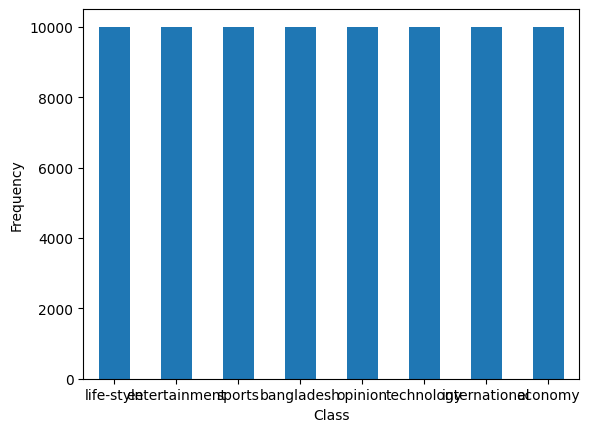

In [9]:
from matplotlib import pyplot as plt

count_classes = temp_data.category.value_counts()
count_classes.plot(kind = 'bar', rot=0)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [10]:
X = temp_data.loc[:,("content")]
Y = temp_data.loc[:,("category")]

In [11]:
Y.value_counts()

category
life-style       10000
entertainment    10000
sports           10000
bangladesh       10000
opinion          10000
technology       10000
international    10000
economy          10000
Name: count, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2)

In [14]:
print(x_train.shape)
print(y_train.value_counts())

(64000,)
category
entertainment    8020
sports           8018
opinion          8014
bangladesh       8014
economy          8013
life-style       8002
international    7971
technology       7948
Name: count, dtype: int64


In [15]:
en = LabelEncoder()
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_df=0.1)

Tf_en_x_train = tfidf.fit_transform(x_train.values.astype(str))
en_y_train = en.fit_transform(y_train)

Tf_en_x_test = tfidf.transform(x_test.values.astype(str))
en_y_test = en.transform(y_test)

In [16]:
print(Tf_en_x_train.shape)

print(en_y_train.shape)

print(Tf_en_x_test.shape)


(64000, 43042)
(64000,)
(16000, 43042)


In [17]:
print(en_y_train[0:15])
print(en.inverse_transform(en_y_train)[0:15])

[6 7 5 6 1 6 5 2 1 0 6 3 7 0 4]
['sports' 'technology' 'opinion' 'sports' 'economy' 'sports' 'opinion'
 'entertainment' 'economy' 'bangladesh' 'sports' 'international'
 'technology' 'bangladesh' 'life-style']


In [18]:
feture_class =['bangladesh','economy', 'entertainment', 'international', 'life-style', 'opinion', 'sports', 'technology']

In [19]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(Tf_en_x_train,en_y_train)

MultinomialNB()

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

nb_pred = nb_model.predict(Tf_en_x_test)
nb_acc = accuracy_score(en_y_test, nb_pred)

print(classification_report(en_y_test,nb_pred))
print(nb_model.score(Tf_en_x_test,en_y_test))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1986
           1       0.82      0.83      0.83      1987
           2       0.90      0.85      0.88      1980
           3       0.91      0.80      0.85      2029
           4       0.82      0.80      0.81      1998
           5       0.66      0.91      0.76      1986
           6       0.93      0.90      0.92      1982
           7       0.89      0.77      0.82      2052

    accuracy                           0.84     16000
   macro avg       0.85      0.84      0.84     16000
weighted avg       0.85      0.84      0.84     16000

0.8383125


In [22]:
from sklearn.metrics import confusion_matrix
nb_pred2 = nb_model.predict(Tf_en_x_train)
cm = confusion_matrix(en_y_train,nb_pred2)
print(cm)
print(accuracy_score(en_y_train, nb_pred2))
# print(y_test.value_counts())

[[6912  371   81   90  120  397    8   35]
 [ 288 6897   34   70   83  388   16  237]
 [  98   30 7062  116  207  297  149   61]
 [ 162   92  109 6587  131  718   94   78]
 [  38   94  263   46 6576  735   48  202]
 [ 113  171   33  150  144 7341   31   31]
 [ 109   69   82   76   57  171 7413   41]
 [  97  356   80  175  400  399   91 6350]]
0.86153125


In [23]:
class_probability = nb_model.predict_proba(Tf_en_x_train)
print(class_probability)

[[0.00135936 0.00144633 0.0150273  ... 0.01627477 0.93898071 0.00332592]
 [0.00370086 0.03149124 0.06194969 ... 0.0635849  0.04091323 0.61027939]
 [0.02808805 0.00309088 0.00215652 ... 0.91503368 0.00346426 0.00201145]
 ...
 [0.68960661 0.01353437 0.01695404 ... 0.19383966 0.01756668 0.01079076]
 [0.01209232 0.0146203  0.72100222 ... 0.09403859 0.07252192 0.01180793]
 [0.05456267 0.03417716 0.01266366 ... 0.05427797 0.00841514 0.00615379]]


In [26]:
# weight_list = []
# for l in class_probability:
#     maxi = 0
#     maxi = max(l)
#     weight_list.append(maxi)
# print(len(weight_list))
# print(weight_list)

In [24]:
weight_list2 = []
i = 0
for l in class_probability:
    prb = l[en_y_train[i]]
    weight_list2.append(prb)
    i+=1
print(len(weight_list2))
print(weight_list2[:20])

64000
[0.9389807068245304, 0.61027939073196, 0.9150336772633699, 0.3649801619245646, 0.867464160465832, 0.9929817269019894, 0.8822568533159755, 0.749999540850575, 0.9641033725879308, 0.42832029163397084, 0.2777494964440563, 0.3011209928220242, 0.43685805867972866, 0.9775250089494004, 0.945607775638789, 0.47985855809796907, 0.14527973146449122, 0.6185262091588755, 0.36679575055662866, 0.1494240660425575]


In [25]:
weights = {0: 0.13, 1: 0.12, 2: 0.12, 3: 0.12, 3:0.12, 4: 0.12, 5: 0.13, 6: 0.13, 7: 0.12}

In [26]:
from sklearn import tree

dt_model = tree.DecisionTreeClassifier(random_state=85)

dt_model.fit(Tf_en_x_train,en_y_train)

DecisionTreeClassifier(random_state=85)

In [27]:
dt_pred = dt_model.predict(Tf_en_x_test)

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
dt_acc = accuracy_score(en_y_test, dt_pred)

print(dt_acc)

print(classification_report(en_y_test,dt_pred))
print(dt_model.score(Tf_en_x_test,en_y_test))

0.68225
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1986
           1       0.66      0.67      0.66      1987
           2       0.73      0.73      0.73      1980
           3       0.67      0.67      0.67      2029
           4       0.67      0.66      0.66      1998
           5       0.61      0.57      0.59      1986
           6       0.77      0.79      0.78      1982
           7       0.65      0.65      0.65      2052

    accuracy                           0.68     16000
   macro avg       0.68      0.68      0.68     16000
weighted avg       0.68      0.68      0.68     16000

0.68225


In [28]:
from sklearn import tree

dt_model2 = tree.DecisionTreeClassifier(random_state=85,class_weight="balanced")

dt_model2.fit(Tf_en_x_train,en_y_train,sample_weight=weight_list2)

DecisionTreeClassifier(class_weight='balanced', random_state=85)

In [29]:
dt_pred2 = dt_model2.predict(Tf_en_x_test)

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
dt_acc2 = accuracy_score(en_y_test, dt_pred2)

print(dt_acc2)

print(classification_report(en_y_test,dt_pred2))
print(dt_model2.score(Tf_en_x_test,en_y_test))

0.6893125
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1986
           1       0.68      0.67      0.67      1987
           2       0.75      0.73      0.74      1980
           3       0.67      0.68      0.68      2029
           4       0.67      0.67      0.67      1998
           5       0.59      0.60      0.59      1986
           6       0.77      0.79      0.78      1982
           7       0.66      0.65      0.66      2052

    accuracy                           0.69     16000
   macro avg       0.69      0.69      0.69     16000
weighted avg       0.69      0.69      0.69     16000

0.6893125


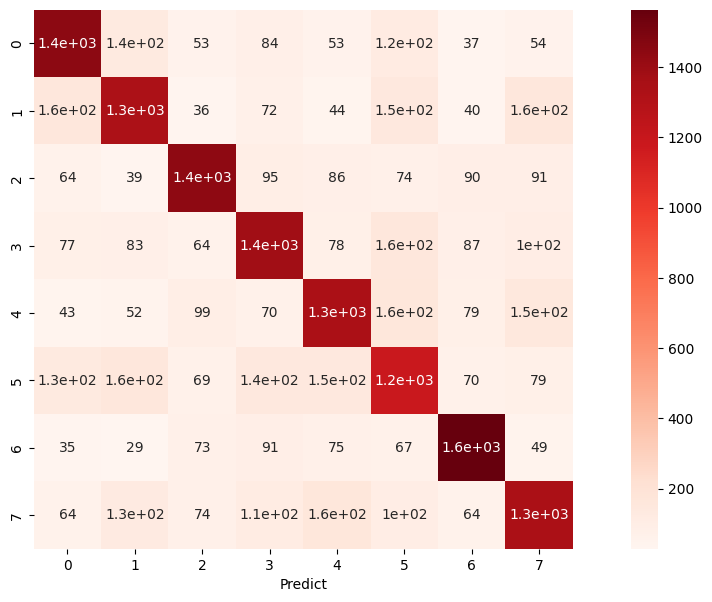

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm_nn = confusion_matrix(en_y_test, dt_pred2)

plt.figure(figsize=(15, 7))
sns.heatmap(cm_nn, annot=True ,cmap="Reds", xticklabels=[0,1,2,3,4,5,6,7], yticklabels= [0,1,2,3,4,5,6,7], square=True)
plt.xlabel("Predict")
# plt.ylable("Actual")
plt.show()